In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Datasets\\drug_review_dataset_with_sentiment.csv")
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,arb blocker,0.000000,neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,NaN,0.168333,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,NaN,0.067210,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,NaN,0.179545,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,NaN,0.194444,positive


In [5]:
df.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125,NaN,0.262917,positive
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34,oral hypoglycemics,-0.276389,negative
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35,NaN,-0.223810,negative
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79,NaN,0.212597,positive
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9.0,"December 13, 2014",116,NaN,0.085417,positive


In [6]:
for i in df.columns:
    print(f"{i} -> {df[i].value_counts().count()} ")

Unnamed: 0 -> 161297 
drugName -> 3436 
condition -> 884 
review -> 112329 
rating -> 10 
date -> 3579 
usefulCount -> 389 
drug_class -> 22 
sentiment -> 37352 
sentiment_label -> 3 


In [7]:
df.describe(include="all")

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
count,161297.000000,161297,160398,161297,161297.000000,161297,161297.000000,23460,161297.000000,161297
unique,NaN,3436,884,112329,NaN,3579,NaN,22,NaN,3
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,"March 1, 2016",NaN,antifungal (except metronidazole),NaN,positive
freq,NaN,3657,28788,33,NaN,146,NaN,4201,NaN,101041
mean,115923.585305,NaN,NaN,NaN,6.994377,NaN,28.004755,NaN,0.064847,NaN
std,67004.445170,NaN,NaN,NaN,3.272329,NaN,36.403742,NaN,0.222437,NaN
min,2.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,-1.000000,NaN
25%,58063.000000,NaN,NaN,NaN,5.000000,NaN,6.000000,NaN,-0.043264,NaN
50%,115744.000000,NaN,NaN,NaN,8.000000,NaN,16.000000,NaN,0.058202,NaN
75%,173776.000000,NaN,NaN,NaN,10.000000,NaN,36.000000,NaN,0.173722,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       161297 non-null  int64  
 1   drugName         161297 non-null  object 
 2   condition        160398 non-null  object 
 3   review           161297 non-null  object 
 4   rating           161297 non-null  float64
 5   date             161297 non-null  object 
 6   usefulCount      161297 non-null  int64  
 7   drug_class       23460 non-null   object 
 8   sentiment        161297 non-null  float64
 9   sentiment_label  161297 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 12.3+ MB


In [10]:
df.isnull().sum()

Unnamed: 0              0
drugName                0
condition             899
review                  0
rating                  0
date                    0
usefulCount             0
drug_class         137837
sentiment               0
sentiment_label         0
dtype: int64

In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
df.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'drug_class', 'sentiment', 'sentiment_label'],
      dtype='object')

# Assignment Questions

### 1. What is the most popular drugs?

In [24]:
df[(df["rating"]==10) & (df["usefulCount"]==df["usefulCount"].max())&(df["sentiment_label"]=="positive")]

,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
6716,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10.0,"July 31, 2008",1291,NaN,0.403333,positive
33552,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10.0,"July 31, 2008",1291,NaN,0.403333,positive


Sertaline and Zoloft are the most popular Drug used by users.

### 2. What are the groups/classification of drugs used?

In [27]:
df["drug_class"].unique()

array(['arb blocker', nan, 'antifungal (except metronidazole)',
       'oral hypoglycemics', 'opiod analgesics', 'antibiotic',
       'anti-anxiety', 'h2 blockers (anti-ulcers)', 'beta blockers',
       'ace inhibitor', 'thrombolytics', 'alpha blocker',
       'corticosteroid (prednisone)', 'antipyschotics (phenothiazine)',
       'antibiotic(penicillins)', 'barbiturate',
       'calcium channel blocker', 'anesthetic', 'pituitary hormone',
       'antibiotic (cephalosporins)', 'beta blocker',
       'neuromuscular blocking agents', 'anticoagulants'], dtype=object)

### 3. Which Drug has the best review?

In [29]:
max_sentiment = df["sentiment"].max()

best_review_drugs = df[(df["sentiment"]==max_sentiment) & (df["sentiment_label"]=="positive")&(df["rating"]==10)]
best_review_drugs

,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
142,Xanax,Panic Disorde,"""2mg of xanax works perfectly for my panic att...",10.0,"July 23, 2008",41,NaN,1.0,positive
377,Norco,Pain,"""I also have knee pain, shoulder pain, elbow a...",10.0,"May 21, 2012",19,NaN,1.0,positive
458,Bactrim DS,Upper Respiratory Tract Infection,"""Best antibiotic I&#039;ve used. I&#039;ve nev...",10.0,"September 9, 2014",14,NaN,1.0,positive
652,Diflucan,Vaginal Yeast Infection,"""Excellent cleared all symtoms in 24hours""",10.0,"March 7, 2008",114,NaN,1.0,positive
830,Lamotrigine,Bipolar Disorde,"""Excellent medication for bipolar disorder alt...",10.0,"June 16, 2011",8,NaN,1.0,positive
...,...,...,...,...,...,...,...,...,...
158365,Durezol,Uveitis,"""Best opthalmic steroid I&#039;ve used for my ...",10.0,"May 21, 2013",27,NaN,1.0,positive
159831,Hydrocortisone,Hemorrhoids,"""After 2 hemorrhoid surgeries, this product wa...",10.0,"November 30, 2014",26,corticosteroid (prednisone),1.0,positive
159909,Abilify,Bipolar Disorde,"""I have had no suicidal thoughts since I&#039;...",10.0,"June 22, 2012",26,NaN,1.0,positive
160648,Trazodone,Anxiety,"""Trazarone 50mg works for me great! I wasn&#03...",10.0,"April 29, 2017",66,opiod analgesics,1.0,positive


### 4. How many drugs do we have?

In [31]:
# on the bases of conditions
unique_drugs = len(df["condition"].unique())

print(f"There are total of {unique_drugs} unique Drugs")

There are total of 885 unique Drugs


### 5. The number of drugs per condition?

In [49]:
# The Number of Drugs Per Condition
pd.DataFrame(df.groupby("condition")["drugName"].unique().apply(lambda x:len(x)).reset_index())

,condition,drugName
0,0</span> users found this comment helpful.,42
1,10</span> users found this comment helpful.,28
2,110</span> users found this comment helpful.,1
3,11</span> users found this comment helpful.,10
4,121</span> users found this comment helpful.,1
...,...,...
879,unctional Gastric Disorde,1
880,ungal Infection Prophylaxis,1
881,ungal Pneumonia,1
882,von Willebrand's Disease,3


### 6. Number of patients that searched on a particular drug?

In [51]:
no_of_people_searched_per_drug = pd.DataFrame(df.groupby("drugName")["usefulCount"].sum())
no_of_people_searched_per_drug

,usefulCount
drugName,
A + D Cracked Skin Relief,6
A / B Otic,20
Abacavir / dolutegravir / lamivudine,650
Abacavir / lamivudine / zidovudine,1
Abatacept,976
...,...
Zyvox,361
ZzzQuil,20
depo-subQ provera 104,0


In [53]:
no_of_people_searched_per_drug.reset_index().max()

drugName       femhrt
usefulCount     58154
dtype: object

# Questions on date

### 1. Distribution of Rating Per Date/Year

In [151]:
df["date"] = pd.to_datetime(df["date"])

In [157]:
df["Year"] = df["date"].dt.year

In [163]:
rating_per_year = df.groupby("Year")["rating"].mean()

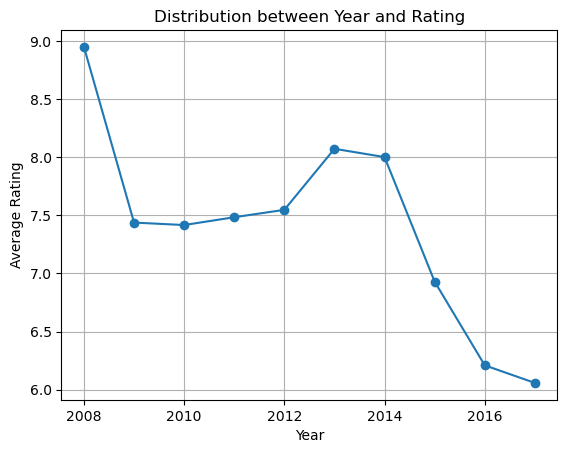

In [169]:
plt.plot(rating_per_year.index, rating_per_year.values,marker="o")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Distribution between Year and Rating")
plt.grid(True)

### 2. Distribution of Review Per Year

In [147]:
df.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'drug_class', 'sentiment', 'sentiment_label'],
      dtype='object')

In [184]:
df["review_length"] = df["review"].str.split(" ").apply(lambda x : len(x))

In [186]:
review_vs_length = df.groupby("Year")["review_length"].mean()

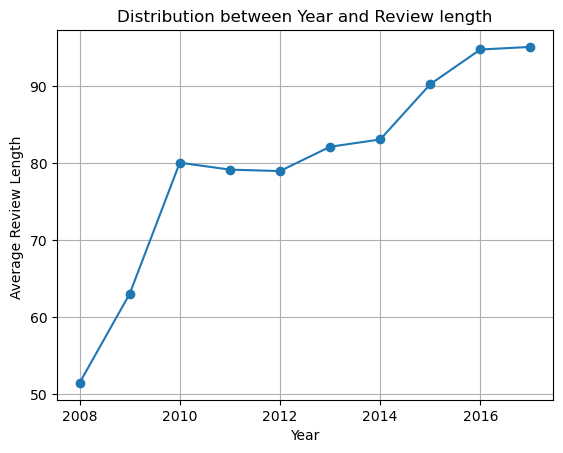

In [188]:
plt.plot(review_vs_length.index, review_vs_length.values,marker="o")
plt.xlabel("Year")
plt.ylabel("Average Review Length ")
plt.title("Distribution between Year and Review length")
plt.grid(True)

"Nowadays, people tend to leave fewer reviews, but the ones they do leave are more detailed and descriptive."

### 3. Amount of review per year

In [193]:
AmountReview_vs_Year = df.groupby("Year")["review"].count()

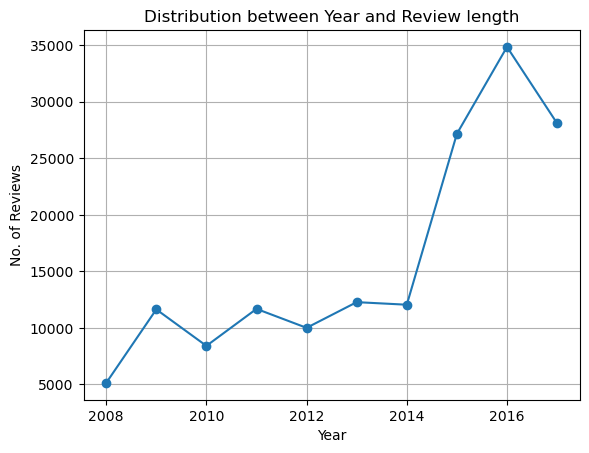

In [195]:
plt.plot(AmountReview_vs_Year.index, AmountReview_vs_Year.values,marker="o")
plt.xlabel("Year")
plt.ylabel("No. of Reviews")
plt.title("Distribution between Year and Review length")
plt.grid(True)